In [1]:
import pandas as pd
import numpy  as np

In [2]:
casurl = 'https://data.rivm.nl/covid-19/'
casfil = 'COVID-19_casus_landelijk.csv'

url = casurl + casfil

!wget -N $url

--2021-06-25 15:16:58--  https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv
Resolving data.rivm.nl (data.rivm.nl)... 2001:610:430:ffff::16:198, 131.224.250.75
Connecting to data.rivm.nl (data.rivm.nl)|2001:610:430:ffff::16:198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147444972 (141M) [text/csv]
Saving to: ‘COVID-19_casus_landelijk.csv’

COVID-19_casus_land 100%[===================>] 140.61M  5.39MB/s    in 21s     

2021-06-25 15:17:19 (6.69 MB/s) - ‘COVID-19_casus_landelijk.csv’ saved [147444972/147444972]



In [3]:
df_case = pd.read_csv(
    casfil,
    sep=';',
    parse_dates=[0, 1],
    infer_datetime_format=True,
)
(
    df_case
    .tail(10)
)

Date_file Date_statistics Date_statistics_type Agegroup  \
1682211 2021-06-25 10:00:00      2021-06-25                  DON    10-19   
1682212 2021-06-25 10:00:00      2021-06-25                  DPL    40-49   
1682213 2021-06-25 10:00:00      2021-06-25                  DON    70-79   
1682214 2021-06-25 10:00:00      2021-06-25                  DPL    60-69   
1682215 2021-06-25 10:00:00      2021-06-25                  DPL    20-29   
1682216 2021-06-25 10:00:00      2021-06-25                  DON    40-49   
1682217 2021-06-25 10:00:00      2021-06-25                  DPL    30-39   
1682218 2021-06-25 10:00:00      2021-06-25                  DON    30-39   
1682219 2021-06-25 10:00:00      2021-06-25                  DPL    70-79   
1682220 2021-06-25 10:00:00      2021-06-25                  DPL    30-39   

            Sex       Province Hospital_admission Deceased  Week_of_death  \
1682211  Female     Gelderland            Unknown  Unknown            NaN   
1682212  Female   Zuid-Holland            Unknown  Unknown            NaN   
1682213    Male        Limburg            Unknown  Unknown            NaN   
1682214  Female   Zuid-Holland            Unknown  Unknown            NaN   
1682215    Male   Zuid-Holland            Unknown  Unknown            NaN   
1682216    Male   Zuid-Holland            Unknown  Unknown            NaN   
1682217    Male   Zuid-Holland            Unknown  Unknown            NaN   
1682218    Male  Noord-Holland            Unknown  Unknown            NaN   
1682219  Female   Zuid-Holland            Unknown  Unknown            NaN   
1682220  Female  Noord-Holland            Unknown  Unknown            NaN   

              Municipal_health_service  
1682211            GGD Gelderland-Zuid  
1682212  Dienst Gezondheid & Jeugd ZHZ  
1682213               GGD Zuid-Limburg  
1682214  Dienst Gezondheid & Jeugd ZHZ  
1682215         GGD Rotterdam-Rijnmond  
1682216  Dienst Gezondheid & Jeugd ZHZ  
1682217         GGD Rotterdam-Rijnmond  
1682218       GGD Zaanstreek/Waterland  
1682219         GGD Rotterdam-Rijnmond  
1682220               GGD Kennemerland

In [4]:
# Define period labels
df_case['period'] = (
    (
        df_case
        ['Date_statistics']
        .dt
        .isocalendar()
        .year
        * 100
    )
    +
    (
        df_case
        ['Date_statistics']
        .dt
        .isocalendar()
        .week
    )
)
df_case['period'] = (
    df_case
    ['period']
    .apply(str)
)
df_case['period'] = (
    df_case
    ['period']
    .apply(
        lambda x: (
            x[:4]
            + 'W'
            + x
            [4:]
        )
    )
)
# Define group labels
df_case['groups'] = (
    (
        df_case
        ['Sex']
        + ' '
    )
    +
    (
        df_case
        ['Agegroup']
    )
)
(
    df_case
    .tail(5)
    .transpose()
    .loc[:, ::-1]
)

1682220                 1682219  \
Date_file                 2021-06-25 10:00:00     2021-06-25 10:00:00   
Date_statistics           2021-06-25 00:00:00     2021-06-25 00:00:00   
Date_statistics_type                      DPL                     DPL   
Agegroup                                30-39                   70-79   
Sex                                    Female                  Female   
Province                        Noord-Holland            Zuid-Holland   
Hospital_admission                    Unknown                 Unknown   
Deceased                              Unknown                 Unknown   
Week_of_death                             NaN                     NaN   
Municipal_health_service     GGD Kennemerland  GGD Rotterdam-Rijnmond   
period                                2021W25                 2021W25   
groups                           Female 30-39            Female 70-79   

                                           1682218                 1682217  \
Date_file                      2021-06-25 10:00:00     2021-06-25 10:00:00   
Date_statistics                2021-06-25 00:00:00     2021-06-25 00:00:00   
Date_statistics_type                           DON                     DPL   
Agegroup                                     30-39                   30-39   
Sex                                           Male                    Male   
Province                             Noord-Holland            Zuid-Holland   
Hospital_admission                         Unknown                 Unknown   
Deceased                                   Unknown                 Unknown   
Week_of_death                                  NaN                     NaN   
Municipal_health_service  GGD Zaanstreek/Waterland  GGD Rotterdam-Rijnmond   
period                                     2021W25                 2021W25   
groups                                  Male 30-39              Male 30-39   

                                                1682216  
Date_file                           2021-06-25 10:00:00  
Date_statistics                     2021-06-25 00:00:00  
Date_statistics_type                                DON  
Agegroup                                          40-49  
Sex                                                Male  
Province                                   Zuid-Holland  
Hospital_admission                              Unknown  
Deceased                                        Unknown  
Week_of_death                                       NaN  
Municipal_health_service  Dienst Gezondheid & Jeugd ZHZ  
period                                          2021W25  
groups                                       Male 40-49

In [5]:
# Pivot to period rows with group columns
df_heat = (
    df_case
    [
        df_case
        ['Municipal_health_service']
        != ''
    ]
    .pivot_table(
        index='period',
        columns='groups',
        values='Date_statistics',
        aggfunc='count',
    )
    .fillna(0)
)
# Select columns to use, optionally subset or use relative numbers
#df_heat['total'] = (
#    df_heat[df_heat.columns[0:24]]
#    .sum(axis=1)
#)
df_heat = (
    df_heat
    [
        df_heat
        .columns[0:24]
    ]
    .loc['2020W26':]
#    .div(
#        df_heat['total'],
#        axis='index',
#    )
)
# Use this for relative growth numbers
#df_heat = df_heat / df_heat.shift()
(
    df_heat
    .tail(5)
    .loc[::-1]
    .transpose()
)

period          2021W25  2021W24  2021W23  2021W22  2021W21
groups                                                     
Female 0-9         46.0    171.0    360.0    629.0    811.0
Female 10-19      211.0    763.0   1249.0   1527.0   1819.0
Female 20-29      180.0    511.0    727.0   1190.0   1850.0
Female 30-39      140.0    358.0    656.0   1075.0   1565.0
Female 40-49      113.0    374.0    572.0   1120.0   1550.0
Female 50-59       87.0    237.0    412.0    807.0   1280.0
Female 60-69       40.0     87.0    156.0    268.0    476.0
Female 70-79       10.0     26.0     40.0     92.0    186.0
Female 80-89        7.0     16.0     31.0     42.0     72.0
Female 90+          3.0      4.0     11.0      5.0     15.0
Female <50          0.0      0.0      0.0      0.0      0.0
Female Unknown      0.0      0.0      0.0      0.0      0.0
Male 0-9           53.0    165.0    395.0    706.0    941.0
Male 10-19        242.0    847.0   1099.0   1506.0   1842.0
Male 20-29        205.0    526.0    720.0   1174.0   1892.0
Male 30-39        111.0    360.0    554.0    971.0   1409.0
Male 40-49         83.0    284.0    497.0    922.0   1456.0
Male 50-59         89.0    276.0    518.0    891.0   1418.0
Male 60-69         33.0     89.0    163.0    287.0    518.0
Male 70-79          8.0     24.0     63.0     96.0    197.0
Male 80-89          5.0     19.0     25.0     25.0     64.0
Male 90+            0.0      4.0      5.0      9.0      6.0
Male <50            0.0      0.0      0.0      0.0      0.0
Male Unknown        0.0      0.0      0.0      0.0      0.0

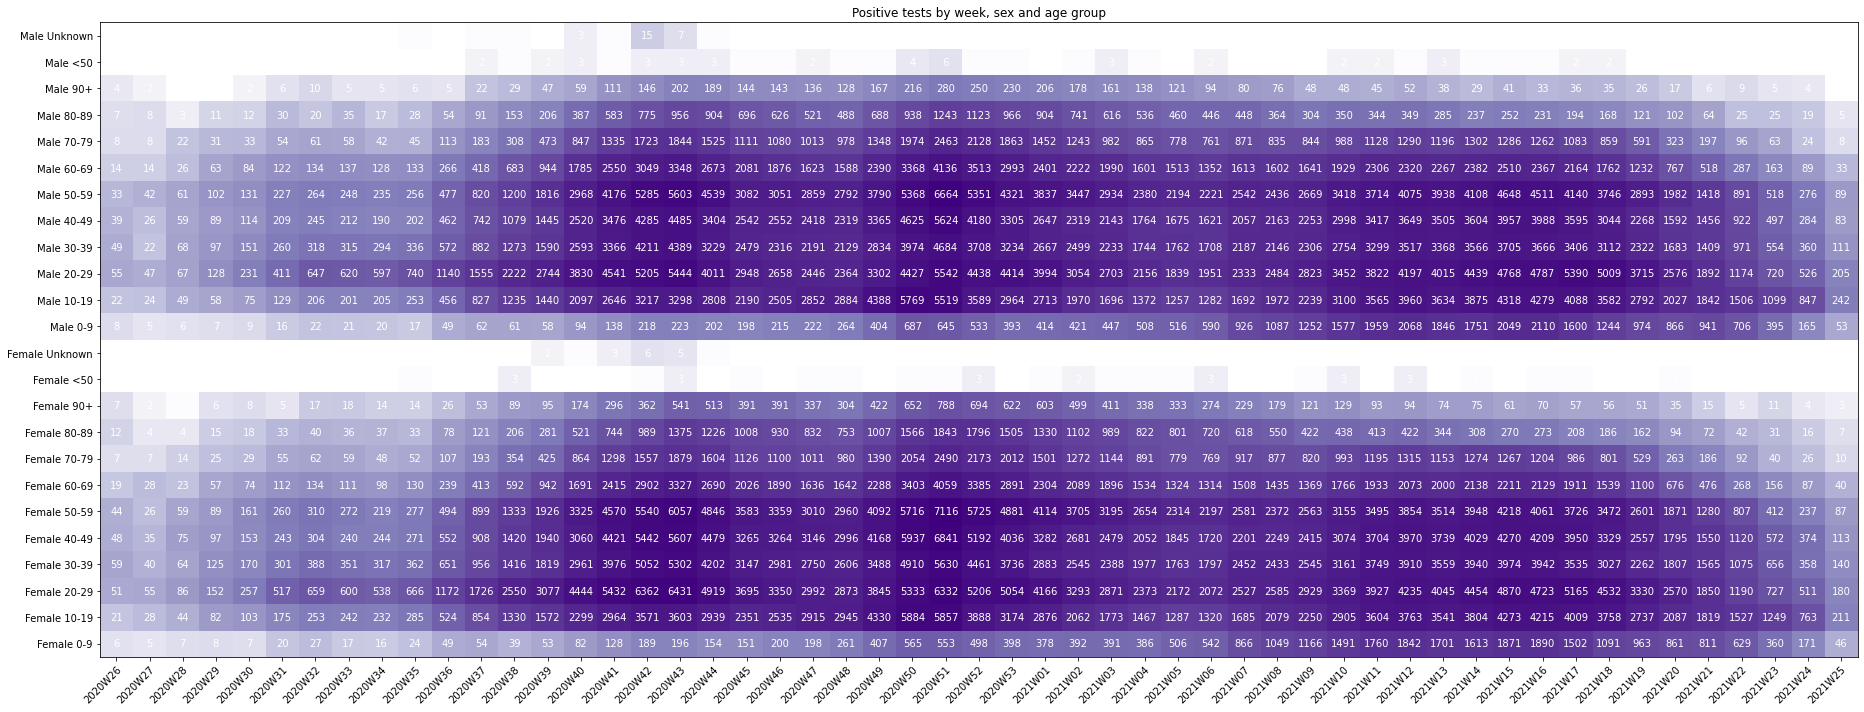

In [6]:
import matplotlib.pyplot as plt

# Define arrays of row and column headers
periods   = df_heat.index
agegroups = df_heat.columns

# Output size may have to be adjusted to data length eventually
fig, ax = plt.subplots(
    figsize=(26, 10),
)

# Heatmap on transposed data, X-axis inverted
heatmap = plt.imshow(
    np.log(
        df_heat
        [df_heat > 0]
        .loc[:]
        .transpose()
    ),
    cmap='Purples',
    interpolation='nearest',
    aspect='auto',
    origin='lower',
)

# Every value is an axis tick
ax.set_xticks(np.arange(len(periods)))
ax.set_yticks(np.arange(len(agegroups)))

ax.set_xticklabels(periods)
ax.set_yticklabels(agegroups)

# X labels diagonally
plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    rotation_mode='anchor',
)

# Convert dataframe to numpy format
np_heat = (
    df_heat
    .to_numpy()
)

# Set numbers as text labels
for i in range(len(periods)):
    for j in range(len(agegroups)):
        text = ax.text(
            i, j,
            int(np_heat[i, j]),
            ha='center',
            va='center',
            color='w',
        )

ax.set_title('Positive tests by week, sex and age group')
fig.tight_layout()
plt.show()